### Exercise 1

Recall that $ n! $ is read as “$ n $ factorial” and defined as
$ n! = n \times (n - 1) \times \cdots \times 2 \times 1 $

In Julia you can compute this value with `factorial(n)`

Write your own version of this function, called `factorial2`, using a `for` loop


<a id='jbe-ex2'></a>

In [1]:
function factorial2(n)
    y=1.0
    for i in 1:n
        y=y*i
    end
    return y
end

factorial2 (generic function with 1 method)

In [2]:
factorial2(6)

720.0

### Exercise 2

The [binomial random variable](https://en.wikipedia.org/wiki/Binomial_distribution) $ Y \sim Bin(n, p) $ represents

- number of successes in $ n $ binary trials  
- each trial succeeds with probability $ p $  


Using only `rand()` from the set of Julia’s built-in random number
generators (not the `Distributions` package), write a function `binomial_rv` such that `binomial_rv(n, p)` generates one draw of $ Y $

Hint: If $ U $ is uniform on $ (0, 1) $ and $ p \in (0,1) $, then the expression `U < p` evaluates to `true` with probability $ p $


<a id='jbe-ex3'></a>

In [3]:
function binomial_rv(n, p)
    y=0
    for i in rand(n)
        if i<p
            y=y+1
        end
    end
    return y
end

binomial_rv (generic function with 1 method)

In [6]:
binomial_rv(100,0.7)

68

### Exercise 3

Compute an approximation to $ \pi $ using Monte Carlo

For random number generation use only `rand()`

Your hints are as follows:

- If $ U $ is a bivariate uniform random variable on the unit square $ (0, 1)^2 $, then the probability that $ U $ lies in a subset $ B $ of $ (0,1)^2 $ is equal to the area of $ B $  
- If $ U_1,\ldots,U_n $ are iid copies of $ U $, then, as $ n $ gets larger, the fraction that falls in $ B $ converges to the probability of landing in $ B $  
- For a circle, area = π * $ radius^2 $  



<a id='jbe-ex4'></a>

In [7]:
function mcpi(n)
    x=rand(n)
    y=rand(n)
    z=0
    for i in 1:n
        if x[i]^2+y[i]^2<=1
            z=z+1
        end
    end
    return z/n*4
end


mcpi (generic function with 1 method)

In [9]:
mcpi(10000000)

3.1406736

### Exercise 4

Write a program that prints one realization of the following random device:

- Flip an unbiased coin 10 times  
- If 3 consecutive heads occur one or more times within this sequence, pay one dollar  
- If not, pay nothing  


Once again use only `rand()` as your random number generator


<a id='jbe-ex5'></a>

In [10]:
function randevi(n)
    x=rand(n)
    y=0
    z=0
    for i in 1:n
       if x[i]>0.5
            y=y+1
            else y=0
        end
        if y>=3
            z=1
        end
    end
    if z==1 print("pay one dollar")
        else print("pay nothing")
    end
    print(x)
end


randevi (generic function with 1 method)

In [13]:
randevi(10)

pay one dollar[0.686036, 0.360577, 0.793218, 0.832733, 0.784644, 0.154595, 0.979536, 0.701385, 0.600086, 0.380966]

### Exercise 5

Simulate and plot the correlated time series

$$
x_{t+1} = \alpha \, x_t + \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 0
\quad \text{and} \quad t = 0,\ldots,n
$$

The sequence of shocks $ \{\epsilon_t\} $ is assumed to be iid and standard normal

Set $ n = 200 $ and $ \alpha = 0.9 $


<a id='jbe-ex6'></a>

In [14]:
function ts(n,𝛼)
    x=zeros(n+1)
    𝜖=randn(n)
    for i in 1:n
        x[i+1]=𝛼*x[i]+𝜖[i]
    end
    return x
end

ts (generic function with 1 method)

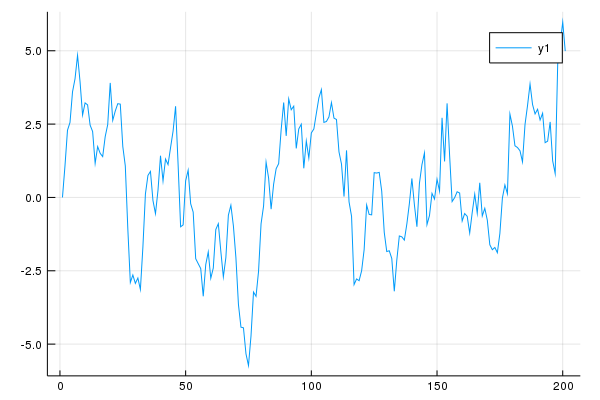

In [15]:
using Plots
gr(fmt=:png);
plot(ts(200,0.9))

### Exercise 6

Plot three simulated time series, one for each of the cases $ \alpha = 0 $, $ \alpha = 0.8 $ and $ \alpha = 0.98 $

(The figure will illustrate how time series with the same one-step-ahead conditional volatilities, as these three processes have, can have very different unconditional volatilities)


<a id='jbe-ex7'></a>

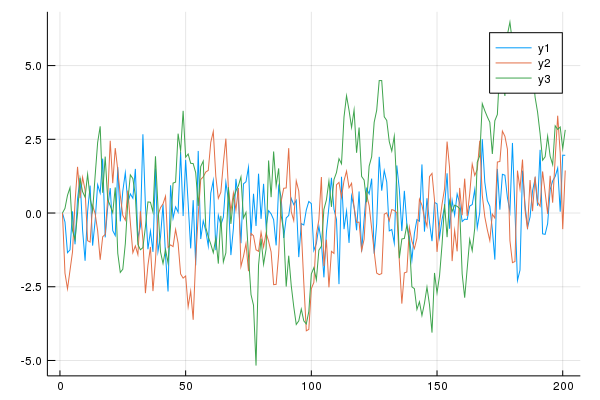

In [16]:
plot([ts(200,0),ts(200,0.8),ts(200,0.98)])

### Exercise 7

This exercise is more challenging

Take a random walk, starting from $ x_0 = 1 $

$$
x_{t+1} = \, \alpha \, x_t + \sigma\, \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 1
\quad \text{and} \quad t = 0,\ldots,t_{\max}
$$

- Furthermore, assume that the $ x_{t_{\max}} = 0 $  (i.e. at $ t_{\max} $, the value drops to zero, regardless of its current state)  
- The sequence of shocks $ \{\epsilon_t\} $ is assumed to be iid and standard normal  
- For a given path $ \{x_t\} $ define a **first-passage time** as $ T_a = \min\{t\, |\, x_t \leq a\} $, where by the assumption of the process $ T_a \leq t_{\max} $  


Start with $ \sigma = 0.2, \alpha = 1.0 $

1. calculate the first-passage time, $ T_0 $, for 100 simulated random walks – to a $ t_{\max} = 200 $ and plot a histogram  
1. plot the sample mean of $ T_0 $ from the simulation for $ \alpha \in \{0.8, 1.0, 1.2\} $  



<a id='jbe-ex8a'></a>

### Exercise 8(a)

This exercise is more challenging

The root of a univariate function $ f(\cdot) $ is an $ x $ such that $ f(x) = 0 $

One solution method to find local roots of smooth functions is called Newton’s method

Starting with an $ x_0 $ guess, a function $ f(\cdot) $ and the first-derivative $ f'(\cdot) $, the algorithm is to repeat

$$
x^{n+1} = x^n - \frac{f(x^n)}{f'(x^n)}
$$

until $ | x^{n+1} - x^n| $ is below a tolerance

1. Use a variation of the `fixedpointmap` code to implement Newton’s method, where the function would accept arguments `f, f_prime, x_0, tolerance, maxiter`  
1. Test it with $ f(x) = (x-1)^3 $ and another function of your choice where you can analytically find the derivative  

### Exercise 8(b)

For those impatient to use more advanced features of Julia, implement a version of Exercise 8(a) where `f_prime` is calculated with auto-differentiation

In [66]:
using ForwardDiff

# operator to get the derivative of this function using AD
D(f) = x -> ForwardDiff.derivative(f, x)

# example usage: create a function and get the derivative
f(x) = x^2
f_prime = D(f)

f(0.1), f_prime(0.1)

(0.010000000000000002, 0.2)

1. Using the `D(f)` operator definition above, implement a version of Newton’s method that does not require the user to provide an analytical derivative  
1. Test the sorts of `f` functions which can be automatically integrated by `ForwardDff.jl`  